In [6]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [7]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

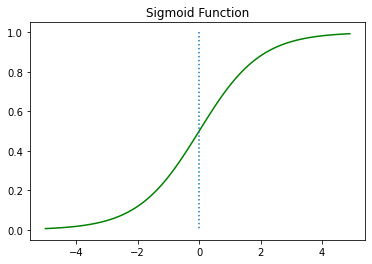

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
torch.manual_seed(1)

In [12]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [13]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [17]:
# hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
hypothesis


tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

In [18]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [19]:
optimizer = optim.SGD([W, b], lr=1)


nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [20]:
prediction = hypothesis >= 0.5
prediction

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])

In [32]:
#로지스틱 회귀
model = nn.Sequential(
    nn.Linear(2, 1), 
    nn.Sigmoid()
    )


In [29]:
model(x_train)

tensor([[0.5843],
        [0.6107],
        [0.4928],
        [0.5688],
        [0.5474],
        [0.4769]], grad_fn=<SigmoidBackward0>)

In [34]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [35]:
model = BinaryClassifier()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.841201 Accuracy 50.00%
Epoch   10/1000 Cost: 0.457889 Accuracy 66.67%
Epoch   20/1000 Cost: 0.423259 Accuracy 83.33%
Epoch   30/1000 Cost: 0.355104 Accuracy 83.33%
Epoch   40/1000 Cost: 0.300464 Accuracy 83.33%
Epoch   50/1000 Cost: 0.251668 Accuracy 83.33%
Epoch   60/1000 Cost: 0.207725 Accuracy 100.00%
Epoch   70/1000 Cost: 0.172860 Accuracy 100.00%
Epoch   80/1000 Cost: 0.152507 Accuracy 100.00%
Epoch   90/1000 Cost: 0.140916 Accuracy 100.00%
Epoch  100/1000 Cost: 0.131552 Accuracy 100.00%
Epoch  110/1000 Cost: 0.123386 Accuracy 100.00%
Epoch  120/1000 Cost: 0.116192 Accuracy 100.00%
Epoch  130/1000 Cost: 0.109807 Accuracy 100.00%
Epoch  140/1000 Cost: 0.104101 Accuracy 100.00%
Epoch  150/1000 Cost: 0.098972 Accuracy 100.00%
Epoch  160/1000 Cost: 0.094335 Accuracy 100.00%
Epoch  170/1000 Cost: 0.090124 Accuracy 100.00%
Epoch  180/1000 Cost: 0.086282 Accuracy 100.00%
Epoch  190/1000 Cost: 0.082762 Accuracy 100.00%
Epoch  200/1000 Cost: 0.079525 Accuracy 100.00